In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
Data = pd.read_csv("Quantitative.csv", sep = ',')
print("Data : " + str(Data.shape))
Data.info()
Quantitative_scales = Data.select_dtypes(include=[np.number])
Quantitative_scales.columns
Data.describe()

Data : (1000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Attr 4     1000 non-null float64
Attr 5     1000 non-null float64
Attr 6     1000 non-null float64
Attr 7     1000 non-null float64
Attr 8     1000 non-null float64
Attr 9     1000 non-null float64
Attr 10    1000 non-null float64
Attr 11    1000 non-null float64
Attr 12    1000 non-null float64
dtypes: float64(9)
memory usage: 70.4 KB


,Attr 4,Attr 5,Attr 6,Attr 7,Attr 8,Attr 9,Attr 10,Attr 11,Attr 12
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.429506,4.096724,3.687289,0.022742,0.050446,0.050446,0.050446,0.050446,15.681429
std,1.463489,3.488631,3.361178,0.934656,0.637652,0.637652,0.637652,0.637652,491.157839
min,-3.256679,-2.560023,-0.509973,-2.612437,-0.892724,-0.892724,-0.892724,-0.892724,-1631.283364
25%,-1.827079,2.249369,1.319508,-0.703916,-0.575071,-0.575071,-0.575071,-0.575071,-337.681402
50%,-0.266172,5.022662,2.462706,0.069515,0.044942,0.044942,0.044942,0.044942,32.891367
75%,0.919199,6.700589,4.862823,0.700821,0.691688,0.691688,0.691688,0.691688,335.313793
max,1.969892,8.883690,10.444894,2.333492,0.995036,0.995036,0.995036,0.995036,1499.253199


In [2]:
for (name, series) in Data.iteritems():
    if str(name).startswith('Attr'):
        existing_column=series
        Q1 = np.percentile(existing_column,25)
        Q3 = np.percentile(existing_column,75)
        range = [Q1 - 1.5*(Q3-Q1), Q3 + 1.5*(Q3-Q1)];
        new_column = np.where(existing_column > range[1], range[1], existing_column)
        new_column = np.where(existing_column < range[0], range[0], new_column)
        normalized_column = stats.zscore(new_column)
        new_column_name = str(name) + "_ClampedValues"
        Data[new_column_name] = new_column
        Normalized_column_name = str(name) + "_ClampedNormalizedValues"
        Data[Normalized_column_name] = normalized_column
Data.to_csv("QTransferred.csv")

{'whiskers': [<matplotlib.lines.Line2D at 0x10a71eb70>,
 'caps': [<matplotlib.lines.Line2D at 0x10a72a470>,
 'boxes': [<matplotlib.lines.Line2D at 0x10a71ea20>,
 'medians': [<matplotlib.lines.Line2D at 0x10a72acc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x10a731128>,
 'means': []}

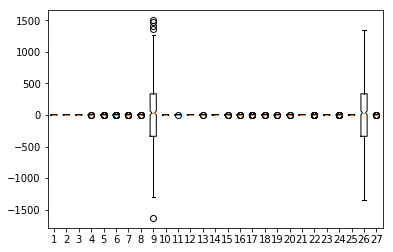

In [3]:
a = np.random.normal(Data)
plt.boxplot(a,150)

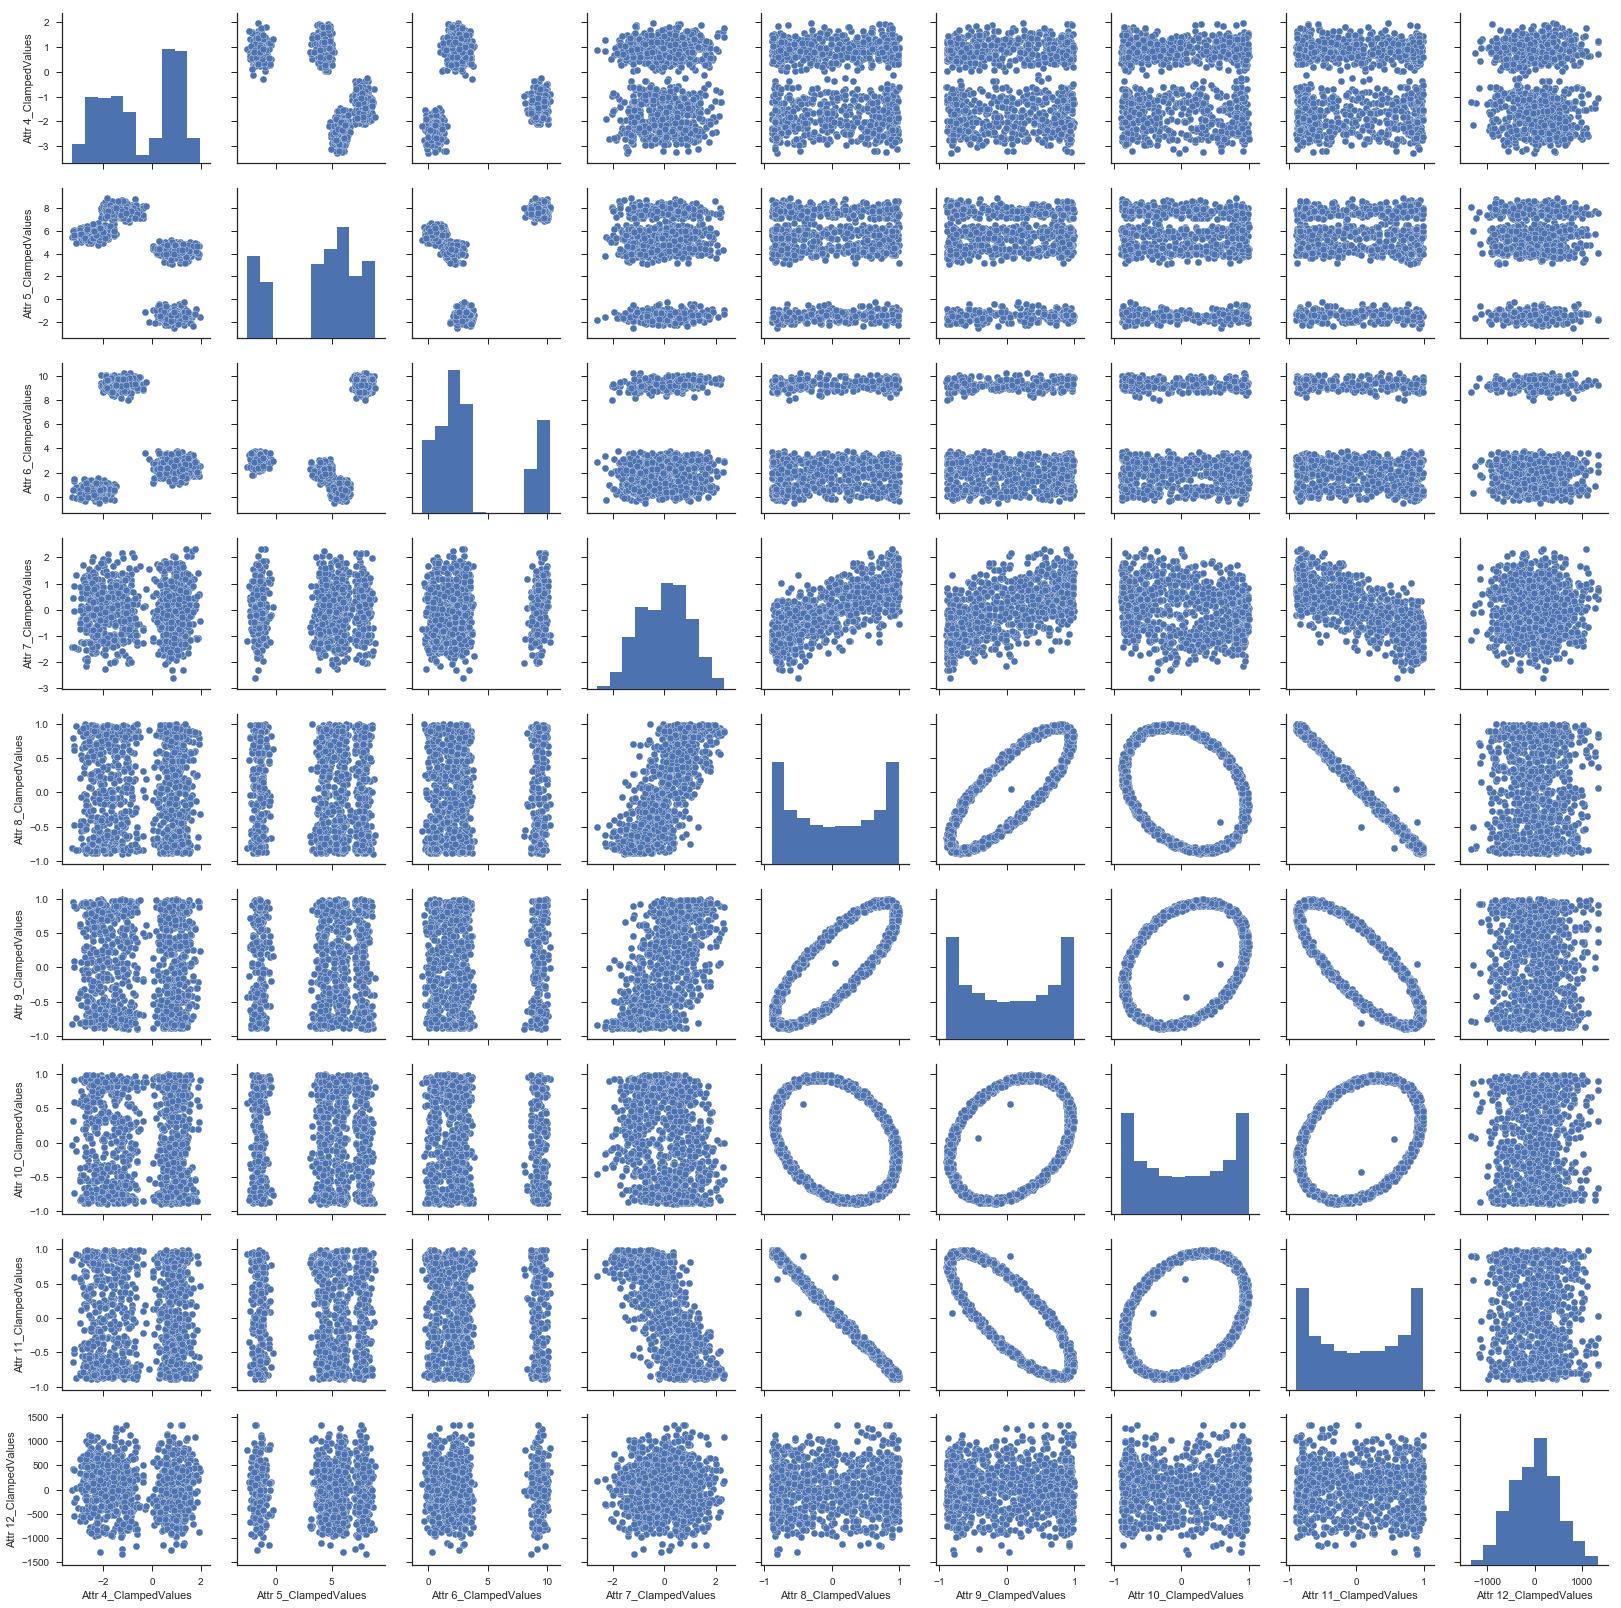

In [4]:
columns = ["Attr 4_ClampedValues", "Attr 5_ClampedValues", "Attr 6_ClampedValues", "Attr 7_ClampedValues", "Attr 8_ClampedValues", "Attr 9_ClampedValues", "Attr 10_ClampedValues", "Attr 11_ClampedValues", "Attr 12_ClampedValues"]
sns.set(style="ticks")
sns.pairplot(Data[columns])
plt.show();

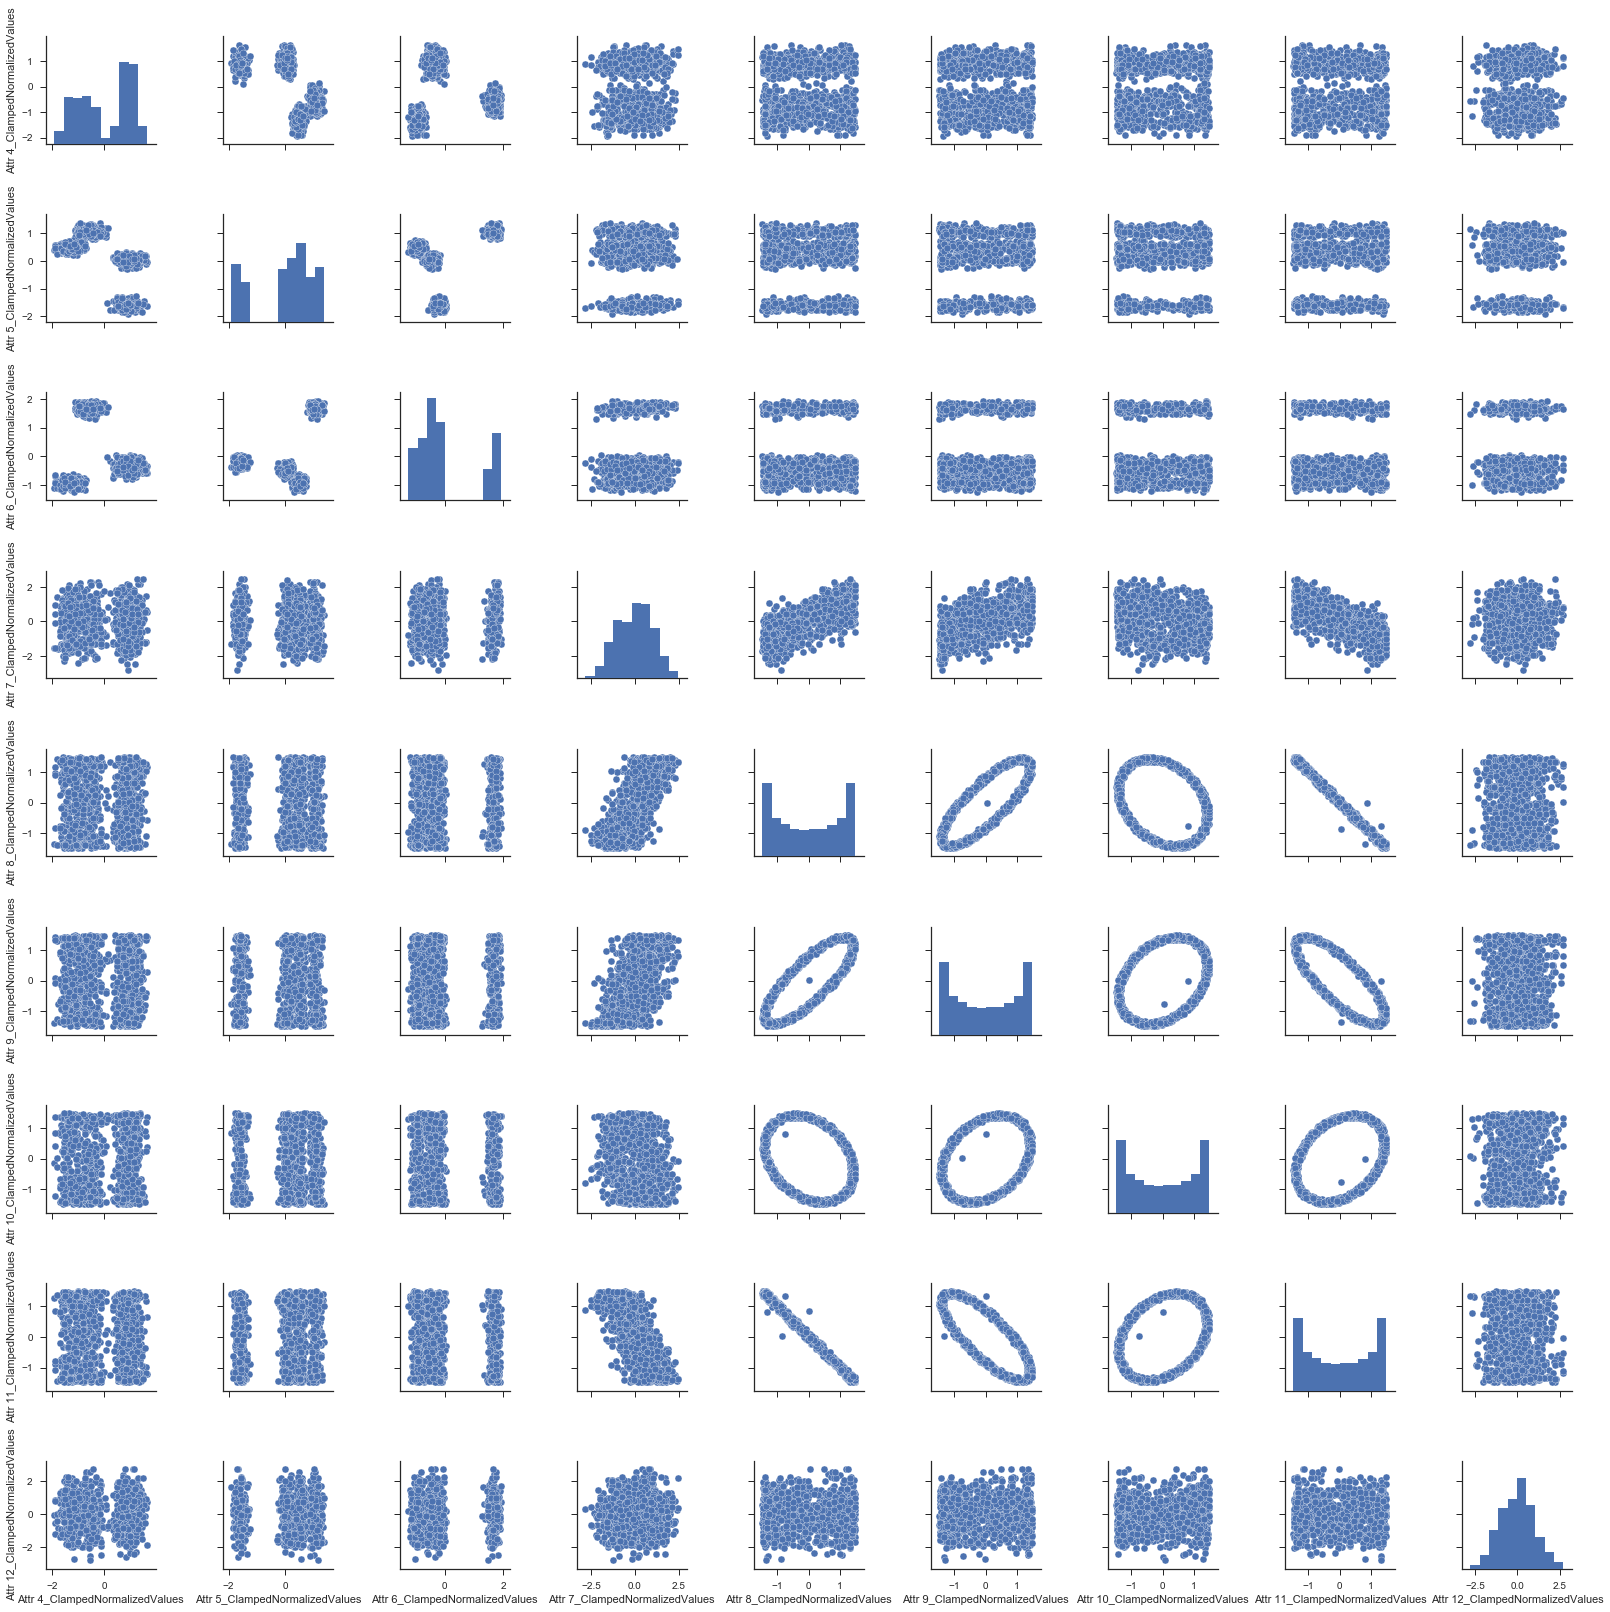

In [5]:
columns_new = ["Attr 4_ClampedNormalizedValues", "Attr 5_ClampedNormalizedValues", "Attr 6_ClampedNormalizedValues", "Attr 7_ClampedNormalizedValues", "Attr 8_ClampedNormalizedValues", "Attr 9_ClampedNormalizedValues", "Attr 10_ClampedNormalizedValues", "Attr 11_ClampedNormalizedValues", "Attr 12_ClampedNormalizedValues"]
sns.set(style="ticks")
sns.pairplot(Data[columns_new])
plt.show();